In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [27]:
data = pd.read_csv('results2.csv')
data

,Cell 1,Cell 2,Cell 3,Cell 4,Cell 5,Cell 6,Cell 7,Cell 8,Cell 9,Cell 10,...,Cell 101,Cell 102,Cell 103,Cell 104,Cell 105,Cell 106,Cell 107,Cell 108,Cell 109,Cell 110
0,403.078,743.931,874.926,1538.045,1119.431,1240.083,1705.113,1855.437,1500.971,1540.246,...,1300.500,1938.971,1904.579,2074.957,776.052,982.760,1430.965,1136.532,2074.902,320.722
1,406.500,739.385,880.838,1540.053,1104.127,1241.320,1681.928,1856.318,1522.779,1525.812,...,1307.818,1948.948,1875.301,2027.500,760.784,1004.267,1385.461,1164.611,2048.706,310.929
2,412.235,737.685,887.529,1541.812,1091.235,1242.196,1663.062,1852.905,1538.971,1505.696,...,1308.830,1947.544,1848.308,1976.246,750.716,1020.068,1340.270,1194.230,2022.912,301.214
3,417.392,737.500,892.456,1539.436,1085.618,1239.289,1651.505,1844.111,1546.212,1481.927,...,1302.227,1934.802,1824.143,1931.826,747.552,1026.295,1305.635,1217.278,1996.206,293.175
4,419.157,737.492,894.081,1530.241,1088.098,1229.103,1645.361,1832.897,1547.240,1458.855,...,1290.125,1915.360,1799.812,1902.145,747.810,1024.219,1287.730,1225.690,1964.618,286.706
5,416.039,737.500,892.838,1516.053,1093.706,1210.536,1640.031,1824.651,1547.731,1440.949,...,1275.602,1892.441,1773.098,1886.978,746.922,1019.219,1285.835,1215.944,1926.667,281.198
6,408.059,737.777,889.824,1502.120,1094.823,1186.464,1633.134,1823.222,1551.019,1429.819,...,1261.273,1868.132,1747.376,1879.065,743.741,1015.856,1293.522,1191.682,1884.245,276.706
7,397.569,737.731,885.801,1493.752,1087.559,1162.979,1626.299,1829.492,1557.154,1422.638,...,1247.864,1847.427,1730.639,1869.971,739.267,1014.781,1302.626,1162.976,1842.529,274.270
8,388.353,736.146,881.176,1493.992,1074.804,1146.835,1623.330,1840.730,1564.308,1415.145,...,1234.909,1838.588,1728.323,1855.029,734.353,1014.322,1308.078,1140.897,1809.343,274.921
9,383.304,733.115,875.640,1500.579,1062.520,1141.021,1624.639,1851.421,1570.192,1406.710,...,1222.318,1844.809,1737.391,1834.717,727.207,1013.904,1308.739,1130.738,1791.225,278.405


In [28]:
# data1 = preprocessing.normalize(data, axis=0)
min_max = preprocessing.MinMaxScaler()
col = data.columns
result = min_max.fit_transform(data)
min_max_df = pd.DataFrame(result, columns=col)

In [29]:
# data1
min_max_df

,Cell 1,Cell 2,Cell 3,Cell 4,Cell 5,Cell 6,Cell 7,Cell 8,Cell 9,Cell 10,...,Cell 101,Cell 102,Cell 103,Cell 104,Cell 105,Cell 106,Cell 107,Cell 108,Cell 109,Cell 110
0,0.747571,0.899679,0.923188,0.994668,1.000000,0.995652,1.000000,0.999045,0.907479,1.000000,...,0.985101,0.990017,1.000000,1.000000,1.000000,0.868166,1.000000,0.846590,1.000000,0.974094
1,0.774690,0.878535,0.946895,0.997510,0.965431,0.998198,0.971834,1.000000,0.935687,0.981177,...,0.998190,1.000000,0.971411,0.958838,0.950897,0.933294,0.932975,0.894904,0.975544,0.897449
2,0.820139,0.870628,0.973726,1.000000,0.936311,1.000000,0.948914,0.996300,0.956631,0.954943,...,1.000000,0.998595,0.945054,0.914383,0.918518,0.981143,0.866411,0.945868,0.951464,0.821413
3,0.861007,0.869767,0.993484,0.996637,0.923624,0.994019,0.934874,0.986766,0.965997,0.923946,...,0.988190,0.985845,0.921458,0.875856,0.908342,1.000000,0.815396,0.985526,0.926532,0.758496
4,0.874994,0.869730,1.000000,0.983622,0.929225,0.973061,0.927410,0.974608,0.967327,0.893858,...,0.966543,0.966390,0.897700,0.850112,0.909172,0.993713,0.789023,1.000000,0.897043,0.707866
5,0.850285,0.869767,0.995016,0.963539,0.941893,0.934859,0.920935,0.965668,0.967962,0.870507,...,0.940567,0.943457,0.871615,0.836957,0.906316,0.978572,0.786232,0.983230,0.861614,0.664757
6,0.787045,0.871056,0.982929,0.943817,0.944416,0.885330,0.912556,0.964119,0.972215,0.855992,...,0.914937,0.919132,0.846498,0.830094,0.896086,0.968388,0.797554,0.941484,0.822010,0.629600
7,0.703913,0.870842,0.966797,0.931973,0.928008,0.837009,0.904252,0.970917,0.980150,0.846627,...,0.890953,0.898414,0.830155,0.822206,0.881697,0.965133,0.810964,0.892091,0.783066,0.610535
8,0.630878,0.863470,0.948251,0.932312,0.899197,0.803792,0.900646,0.983100,0.989404,0.836855,...,0.867781,0.889569,0.827894,0.809246,0.865894,0.963743,0.818994,0.854100,0.752084,0.615630
9,0.590866,0.849372,0.926051,0.941636,0.871450,0.791830,0.902236,0.994691,0.997015,0.825855,...,0.845260,0.895794,0.836748,0.791629,0.842912,0.962477,0.819968,0.836620,0.735170,0.642897


In [30]:
 x = min_max_df.iloc[:,0:110] # 1t for rows and second for columns
x

,Cell 1,Cell 2,Cell 3,Cell 4,Cell 5,Cell 6,Cell 7,Cell 8,Cell 9,Cell 10,...,Cell 101,Cell 102,Cell 103,Cell 104,Cell 105,Cell 106,Cell 107,Cell 108,Cell 109,Cell 110
0,0.747571,0.899679,0.923188,0.994668,1.000000,0.995652,1.000000,0.999045,0.907479,1.000000,...,0.985101,0.990017,1.000000,1.000000,1.000000,0.868166,1.000000,0.846590,1.000000,0.974094
1,0.774690,0.878535,0.946895,0.997510,0.965431,0.998198,0.971834,1.000000,0.935687,0.981177,...,0.998190,1.000000,0.971411,0.958838,0.950897,0.933294,0.932975,0.894904,0.975544,0.897449
2,0.820139,0.870628,0.973726,1.000000,0.936311,1.000000,0.948914,0.996300,0.956631,0.954943,...,1.000000,0.998595,0.945054,0.914383,0.918518,0.981143,0.866411,0.945868,0.951464,0.821413
3,0.861007,0.869767,0.993484,0.996637,0.923624,0.994019,0.934874,0.986766,0.965997,0.923946,...,0.988190,0.985845,0.921458,0.875856,0.908342,1.000000,0.815396,0.985526,0.926532,0.758496
4,0.874994,0.869730,1.000000,0.983622,0.929225,0.973061,0.927410,0.974608,0.967327,0.893858,...,0.966543,0.966390,0.897700,0.850112,0.909172,0.993713,0.789023,1.000000,0.897043,0.707866
5,0.850285,0.869767,0.995016,0.963539,0.941893,0.934859,0.920935,0.965668,0.967962,0.870507,...,0.940567,0.943457,0.871615,0.836957,0.906316,0.978572,0.786232,0.983230,0.861614,0.664757
6,0.787045,0.871056,0.982929,0.943817,0.944416,0.885330,0.912556,0.964119,0.972215,0.855992,...,0.914937,0.919132,0.846498,0.830094,0.896086,0.968388,0.797554,0.941484,0.822010,0.629600
7,0.703913,0.870842,0.966797,0.931973,0.928008,0.837009,0.904252,0.970917,0.980150,0.846627,...,0.890953,0.898414,0.830155,0.822206,0.881697,0.965133,0.810964,0.892091,0.783066,0.610535
8,0.630878,0.863470,0.948251,0.932312,0.899197,0.803792,0.900646,0.983100,0.989404,0.836855,...,0.867781,0.889569,0.827894,0.809246,0.865894,0.963743,0.818994,0.854100,0.752084,0.615630
9,0.590866,0.849372,0.926051,0.941636,0.871450,0.791830,0.902236,0.994691,0.997015,0.825855,...,0.845260,0.895794,0.836748,0.791629,0.842912,0.962477,0.819968,0.836620,0.735170,0.642897


In [41]:
kmeans = KMeans(5, max_iter=500)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([3, 3, 3, ..., 4, 4, 4])

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
       ..
1000    4
1001    4
1002    4
1003    4
1004    4
1005    4
1006    4
1007    4
1008    4
1009    4
1010    4
1011    4
1012    4
1013    4
1014    4
1015    4
1016    4
1017    4
1018    4
1019    4
1020    4
1021    4
1022    4
1023    4
1024    4
1025    4
1026    4
1027    4
1028    4
1029    4
Name: Clusters, Length: 1030, dtype: int32


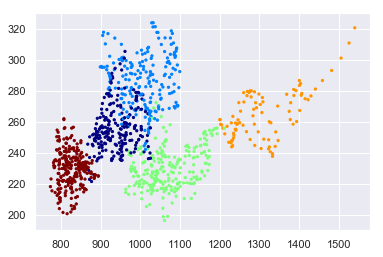

In [52]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
print(data_with_clusters['Clusters'])

plt.scatter(data_with_clusters['Cell 10'],data_with_clusters['Cell 110'],c=data_with_clusters['Clusters'],cmap='jet',
           s=5)

Text(0, 0.5, 'WCSS')

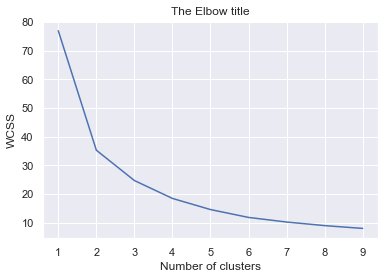

In [72]:
wcss=[]
for i in range(1,5):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,5)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')